<a href="https://colab.research.google.com/github/anirudh135/StockMarketAnalysis-BTP/blob/main/Stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('itc_2019_dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,282.200012,283.549988,279.799988,282.700012,263.820862,2490548.0
1,2019-01-02,282.250000,283.250000,277.549988,280.600006,261.861084,9934187.0
2,2019-01-03,280.600006,282.450012,277.750000,278.850006,260.227936,6114946.0
3,2019-01-04,279.149994,282.950012,279.149994,280.950012,262.187714,7805148.0
4,2019-01-07,284.299988,285.250000,281.000000,281.649994,262.840973,9757529.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       242 non-null    object 
 1   Open       241 non-null    float64
 2   High       241 non-null    float64
 3   Low        241 non-null    float64
 4   Close      241 non-null    float64
 5   Adj Close  241 non-null    float64
 6   Volume     241 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.4+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(axis=0)

Text(0.5, 1.0, 'ITC Autocorrelation plot')

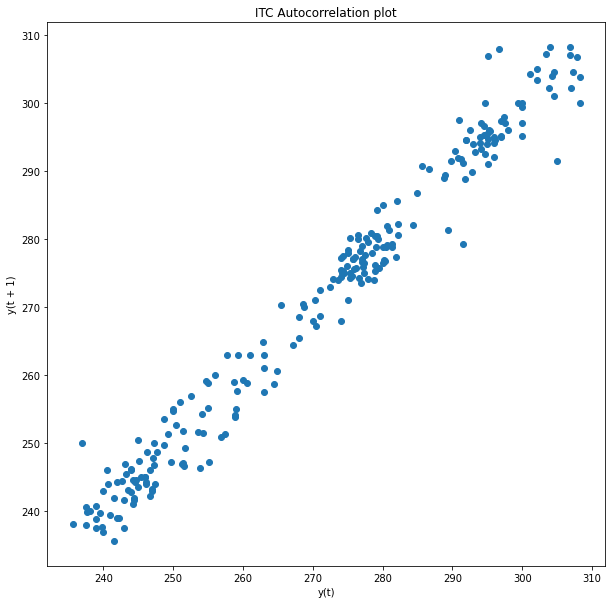

In [ ]:
# A positive linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=1)
plt.title('ITC Autocorrelation plot')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       241 non-null    datetime64[ns]
 1   Open       241 non-null    float64       
 2   High       241 non-null    float64       
 3   Low        241 non-null    float64       
 4   Close      241 non-null    float64       
 5   Adj Close  241 non-null    float64       
 6   Volume     241 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.1 KB


In [ ]:
train_data = df.loc[df.loc[:,'Date'] <= '2019-10-1']
test_data = df.loc[df.loc[:,'Date'] >= '2019-10-1']

In [ ]:
type(train_data)

pandas.core.frame.DataFrame

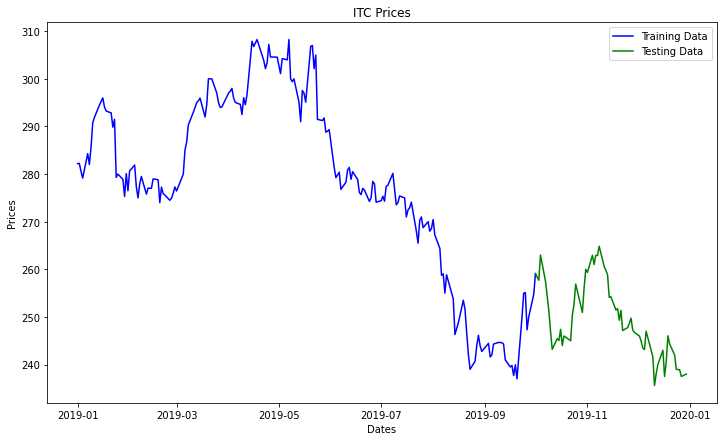

In [ ]:
plt.figure(figsize=(12,7))
plt.title('ITC Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Date'],train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data['Date'],test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)


<class 'list'>


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
MAPE_arima = mean_absolute_percentage_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % MAPE_arima)

Testing Mean Squared Error: 3.534


In [ ]:
#Holt winter model

In [ ]:
df.Date.freq = 'MS'

In [ ]:
train_hw = train_data.iloc[:,1]
test_hw = test_data.iloc[:,1]
model = ExponentialSmoothing(train_hw, seasonal='mul', seasonal_periods=7).fit()
pred = model.predict(start=test_hw.index[1], end=test_hw.index[-1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
MAPE_hw = mean_absolute_percentage_error(test_hw, pred)
print('Testing Mean Squared Error: %.3f' % MAPE_hw)

Testing Mean Squared Error: 4.332


In [ ]:
#Artificial Neural Network

In [ ]:
X_Train,y_Train =  train_data.iloc[:,2:-1],train_data.iloc[:,1]
X_Test,y_Test = test_data.iloc[:,2:-1],test_data.iloc[:,1]

In [ ]:
model1 = Sequential()
model1.add(Dense(units = 32, activation = 'relu', input_dim = 4))
model1.add(Dense(units= 32, activation = 'relu'))
model1.add(Dense(units = 1))
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.fit(X_Train, y_Train, batch_size = 10)

19/19 [==============================] - 0s 1ms/step - loss: 2302.5439


In [ ]:
y_pred = model1.predict(X_Test)

In [ ]:
MAPE_ANN = mean_absolute_percentage_error(Y_Test,y_pred)
print('Testing Mean Squared Error: %.3f' % MAPE_ANN)

Testing Mean Squared Error: 8.567


In [ ]:
#Recurring Neural Network

In [ ]:
training_data = train_data.iloc[:,1].values
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [ ]:
test_data1 = test_data.iloc[:,1].values
test_data1 = scaler.fit_transform(test_data1.reshape(-1, 1))
test_data1 = np.array(test_data1)
test_data1 = np.reshape(test_data1, (test_data1.shape[0], test_data1.shape[1], 1))

In [ ]:
x_training_data = []

y_training_data =[]
for i in range(120, len(training_data)):
    x_training_data.append(training_data[i-120:i, 0])
    y_training_data.append(training_data[i, 0])



In [ ]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [ ]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1))

In [ ]:
rnn = Sequential()
rnn.add(LSTM(units = 6, return_sequences = True, input_shape = (4, 1)))
rnn.add(Dropout(0.2))
for i in [True, True, False]:
  rnn.add(LSTM(units = 45, return_sequences = i))
  rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(x_training_data,y_training_data, batch_size = 10)

7/7 [==============================] - 1s 124ms/step - loss: 0.0555


In [ ]:
prediction_rnn = rnn.predict(test_data1)

In [ ]:
prediction_rnn = scaler.inverse_transform(prediction_rnn)

In [ ]:
MAPE_RNN = mean_absolute_percentage_error(Y_Test,y_pred)
print('Testing Mean Squared Error: %.3f' % MAPE_RNN)

Testing Mean Squared Error: 8.567
